<a href="https://colab.research.google.com/github/ilirsheraj/AutoEncoders-GANs/blob/main/Chpt_01_Basics_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Coding a Perceptron

These exercises are taken from Michael Leaham's Book "Generating a New Reality"

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
Y = np.array([0,1,1,0])
print(X.shape)
print(Y.shape)

(4, 2)
(4,)


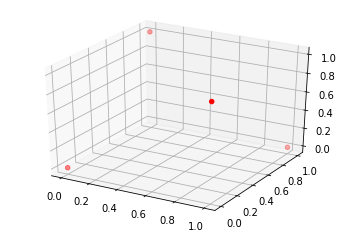

In [4]:
# Plot the whole thing
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], Y, X[:,1], c='r', marker='o')
plt.show()

In [5]:
# Initializ e the weights
no_of_inputs = X.shape[1]
weights = np.random.rand(no_of_inputs + 1)
print(weights)
print()
print(weights.shape)

[0.53107797 0.26700942 0.59041229]

(3,)


In [6]:
# Example of a working Perceptron
for i in range(len(X)):
    inputs = X[i]
    print(inputs)
    summation = np.dot(inputs, weights[1:]) + weights[0]
    print(summation)

[0 0]
0.5310779658600641
[0 1]
1.1214902561952254
[1 0]
0.7980873868702343
[1 1]
1.3884996772053957


In [7]:
# Let's train a perceptron
learning_rate = 0.1
epochs = 100
history = []
for i in range(epochs):
    for inputs, label in zip(X,Y):
        prediction = np.dot(inputs, weights[1:]) + weights[0]
        loss = label - prediction
        history.append(loss*loss)
#        print("loss = {}".format(history[i]))
        weights[1:] += learning_rate*loss*inputs
        weights[0] += learning_rate*loss

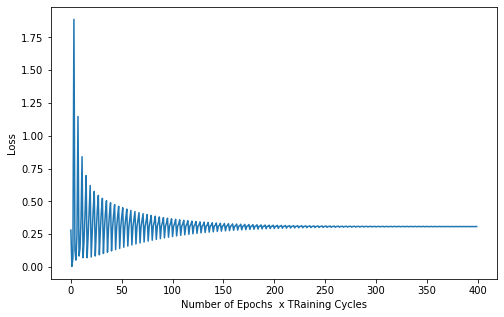

In [8]:
fig = plt.figure(figsize=(8,5))
plt.plot(history)
plt.xlabel("Number of Epochs  x TRaining Cycles")
plt.ylabel("Loss")
plt.show()

# Exercise 2: Linear Regression With Perceptron

In [9]:
X = np.array([[1,2,3], [3,4,5], [5,6,7], [7,8,9], [9,8,7]])
Y = np.array([1,2,3,4,5])

print(X.shape)
print(Y.shape)

(5, 3)
(5,)


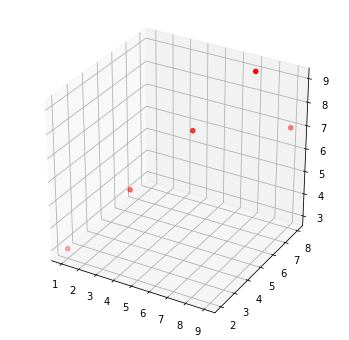

In [10]:
from matplotlib import projections
# Plot the whole thing
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], X[:,2], c = "r", marker="o")

In [11]:
number_of_inputs = X.shape[1]
epochs=50
learning_rate=0.01
weights=np.random.randn(number_of_inputs + 1)
print(weights)
print(weights.shape)

[0.81052352 1.49355514 0.23266476 1.60831362]
(4,)


In [12]:
# Define ReLU activation function
def relu_activation(sum):
    if sum > 0:
        return sum
    else:
        return 0

In [13]:
# Define a Perceptron Class
class Perceptron(object):
    def __init__(self, no_of_inputs, activation):
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)
        self.activation = activation

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activation(summation)

    def train(self, training_inputs, training_labels, epochs=100, learning_rate=0.01):
        history = []
        for _ in range(epochs):
            for inputs,label in zip(training_inputs, training_labels):
                prediction = self.predict(inputs)
                loss = (label - prediction)
                loss2 = loss*loss
                history.append(loss2)
                self.weights[1:] += self.learning_rate * loss * inputs
                self.weights[0] += self.learning_rate * loss
        return history

In [14]:
# Instantiate the class
perceptron = Perceptron(number_of_inputs, relu_activation)
history = perceptron.train(X,Y,epochs=epochs)

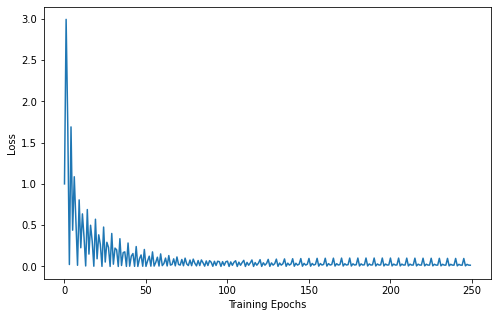

In [15]:
fig = plt.figure(figsize=(8,5))
plt.plot(history)
plt.xlabel("Training Epochs")
plt.ylabel("Loss")
plt.show()

# Exercise 3: Solving XOR with MLP on PyTorch

In [85]:
import torch
import torch.nn as nn 
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [17]:
# Define the class
class XorNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,10)
        self.fc2 = nn.Linear(10,1)
    
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
# Instantiate the model
model = XorNet()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Define the number of epochs
epochs = 500

In [19]:
X = np.array([[0., 0.], [1.,1.], [0.,1.], [1., 0.]])
Y = np.array([0., 0., 1., 1.])

# Convert to tensor
y_train_t = torch.from_numpy(Y).clone().reshape(-1,1)
x_train_t = torch.from_numpy(X).clone()

history = []

In [20]:
x_train_t

tensor([[0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 0.]], dtype=torch.float64)

In [21]:
y_train_t

tensor([[0.],
        [0.],
        [1.],
        [1.]], dtype=torch.float64)

In [22]:
# Train the model
for i in range(epochs):
    for batch_ind in range(4):
        x_batch = Variable(torch.Tensor(x_train_t.float()))
        y_batch = Variable(torch.Tensor(y_train_t.float()))
        y_pred = model(x_batch)
        loss = loss_fn(y_pred, y_batch)
        history.append(loss.item())
        # Zero the gradient of the optimizer (reset the optimizer)
        optimizer.zero_grad()
        # Apply the loss backward
        loss.backward()
        # Next optimization step
        optimizer.step()

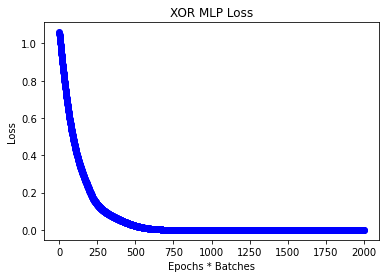

In [23]:
plt.plot(history, "bo-")
plt.ylabel("Loss")
plt.xlabel("Epochs * Batches")
plt.title("XOR MLP Loss")
plt.show()

In [24]:
# Predict the outcome for single point using the same model
# Expected 1
v = Variable(torch.FloatTensor([1,0]))
model(v)

tensor([1.0000], grad_fn=<AddBackward0>)

In [25]:
# Expected zero
v = Variable(torch.FloatTensor([1,1]))
model(v)

tensor([1.0021e-06], grad_fn=<AddBackward0>)

# Exercise 4: Predicting House Prices with PyTorch

In [34]:
# Add sklearn for boston data and train0test splitting
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [35]:
# Load the data and explore it
boston = load_boston()
X,y = boston.data, boston.target
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [42]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [44]:
inputs = X.shape[1]
inputs

13

In [46]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
num_train = X_train.shape[0]
num_train

404

In [47]:
X_train[:2], y_train[:2]

(array([[3.5809e-01, 0.0000e+00, 6.2000e+00, 1.0000e+00, 5.0700e-01,
         6.9510e+00, 8.8500e+01, 2.8617e+00, 8.0000e+00, 3.0700e+02,
         1.7400e+01, 3.9170e+02, 9.7100e+00],
        [1.5876e-01, 0.0000e+00, 1.0810e+01, 0.0000e+00, 4.1300e-01,
         5.9610e+00, 1.7500e+01, 5.2873e+00, 4.0000e+00, 3.0500e+02,
         1.9200e+01, 3.7694e+02, 9.8800e+00]]), array([26.7, 21.7]))

In [50]:
from torch.nn.modules.activation import Sigmoid
from torch.nn.modules.linear import Linear
# Create Sequential Model
torch.set_default_dtype(torch.float64)

# define the network
net = nn.Sequential(
    nn.Linear(inputs, 50, bias=True), # Input
    nn.ReLU(),
    nn.Linear(50,50, bias=True),      # Hidden 1
    nn.ReLU(),
    nn.Linear(50,50, bias=True),      # Hidden 2
    nn.Sigmoid(),
    nn.Linear(50,1),                  # Output
    )

# Define the loss function
lossfun = nn.MSELoss()
# Define the Optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [51]:
print(net)

Sequential(
  (0): Linear(in_features=13, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=50, bias=True)
  (3): ReLU()
  (4): Linear(in_features=50, out_features=50, bias=True)
  (5): Sigmoid()
  (6): Linear(in_features=50, out_features=1, bias=True)
)


In [58]:
# Convert data o tensors
numepochs = 8000
y_train_t = torch.from_numpy(y_train).clone().reshape(-1,1)
x_train_t = torch.from_numpy(X_train).clone()
y_test_t = torch.from_numpy(y_test).clone().reshape(-1,1)
x_test_t = torch.from_numpy(X_test).clone()
trainLoss = []
testLoss = []

In [59]:
# Train the Model
for i in range(numepochs):
    # Forward Pass
    y_pred = net(x_train_t)
    # Calculate the loss
    loss = lossfun(y_pred,y_train_t)
    # Append the loss
    trainLoss.append(loss.data)
    # Back propagate
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    test_loss = lossfun(y_test_t,net(x_test_t))
    testLoss.append(test_loss.data)

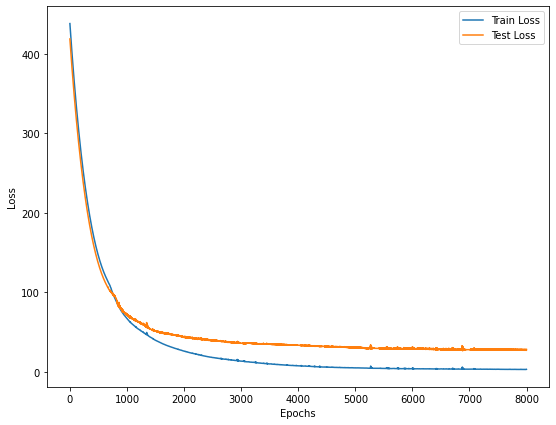

In [63]:
fig = plt.figure(figsize=(9,7))
plt.plot(trainLoss, label="Train Loss")
plt.plot(testLoss, label="Test Loss")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

In [76]:
# Change the number of neurons, make it shallower
net = nn.Sequential(
    nn.Linear(inputs, 30, bias=True), # Input
    nn.ReLU(),
    nn.Linear(30,30, bias=True),      # Hidden 1
#    nn.ReLU(),
#    nn.Linear(30,30, bias=True),      # Hidden 2
    nn.Sigmoid(),
    nn.Linear(30,1),                  # Output
    )

# Define the loss function
lossfun = nn.MSELoss()
# Define the Optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)

In [77]:
# Train the Model
trainLoss = []
testLoss = []
for i in range(numepochs):
    # Forward Pass
    y_pred = net(x_train_t)
    # Calculate the loss
    loss = lossfun(y_pred,y_train_t)
    # Append the loss
    trainLoss.append(loss.data)
    # Back propagate
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    test_loss = lossfun(y_test_t,net(x_test_t))
    testLoss.append(test_loss.data)

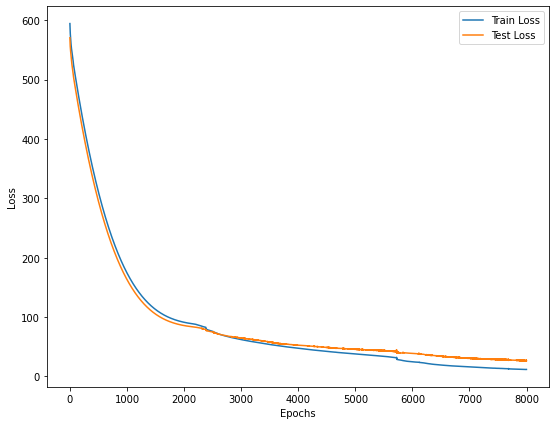

In [78]:
fig = plt.figure(figsize=(9,7))
plt.plot(trainLoss, label="Train Loss")
plt.plot(testLoss, label="Test Loss")
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

# Exercise 5: Classifying MNIST with PyTorch

In [89]:
# Import the packages for MNIST
import torchvision
import torchvision.datasets as dset
import torchvision.transforms as transforms
# transfromrs object to create a tensor transformation of the data since the image data are in grayscale (0-255) and we transform them to values 0-1

In [81]:
import os
root = "./data"
if not os.path.exists(root):
    os.mkdir(root)

In [82]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (1.0))])

# Download the MNIST dataset
train_set = dset.MNIST(root=root, train=True, transform=trans, download=True)

test_set = dset.MNIST(root=root, train=False, transform=trans, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [83]:
print(train_set)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=1.0)
           )


In [84]:
print(test_set)

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=0.5, std=1.0)
           )


In [93]:
# Define batches and convert data into dataloader
batchsize = 64
train_loader = DataLoader(train_set, batch_size=batchsize, shuffle=True)
test_loader = DataLoader(test_set, batch_size=batchsize, shuffle=False)
print(len(train_loader))
print(len(test_loader))

938
157


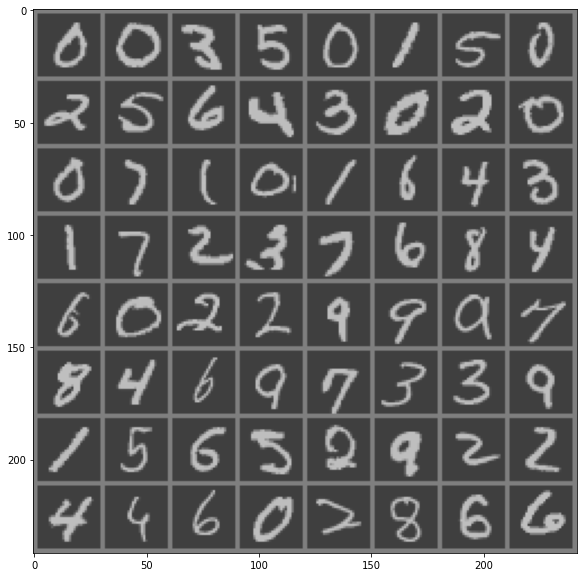

In [90]:
# Show some random images
def imshow(img):
  img = img / 2 + 0.5     
  npimg = img.numpy()
  plt.figure(figsize=(10, 10))
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

dataiter = iter(train_loader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images, nrow=8))

In [95]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 500)
        self.fc2 = nn.Linear(500, 256)
        self.fc3 = nn.Linear(265,10)

    # Forward Pass
    def forward(self,x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x
    
    def name(self):
        return "MLP"

In [99]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.fc1 = nn.Linear(28*28, 500)
    self.fc2 = nn.Linear(500, 256)
    self.fc3 = nn.Linear(256, 10)
  def forward(self, x):
    x = x.view(-1, 28*28)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def name(self):
      return "MLP"

In [103]:
model = MLP()
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01, momentum = 0.9)
loss_fn = nn.CrossEntropyLoss()

In [104]:
epochs = 10
history=[]
for epoch in range(epochs):  
  avg_loss = 0
  for batch_idx, (x, y) in enumerate(train_loader):
    optimizer.zero_grad()    
    x, y = Variable(x), Variable(y)
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    avg_loss = avg_loss * 0.9 + loss.data * 0.1
    history.append(avg_loss)
    loss.backward()
    optimizer.step()    

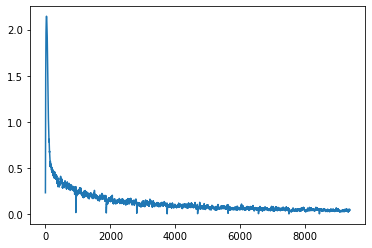

In [105]:
plt.plot(history)

In [97]:
# Train the model
numepochs = 10
batchTrain =[]
batchTest = []
trainAcc = []
testAcc = []

for epoch in range(numepochs):
    avg_loss = 0
    for batch_idx, (x,y) in enumerate(train_loader):
        optimizer.zero_grad()
        x,y = Variable(x), Variable(y)
        y_pred = model(x)
        loss = lossfun(y_pred,y)
        avg_loss = avg_loss*0.9 + loss.data*0.1
        batchTrain = []
        loss.backward()
        optimizer.step()
    trainLoss.append(np.mean(batchTrain))
    for batch_tdx, (x,y) in enumerate(test_loader):
        test_loss = lossfun(y,model(x))
        batchTest.append(test_loss.data)
    testLoss.append(np.mean(batchTest))

RuntimeError: ignored